# Subplots with matplotlib

We already saw that we can use [napari](napari.org) to interactively visualize images. Sometimes, we may want to have a static view inside a notebook to consistently share with collaborators or as material in a publication.

Python has many libraries for plotting data, like [Matplotlib](https://matplotlib.org/stable/gallery/index.html), [Seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/python/) and [bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html#standalone-examples), to name a few. Some libraries ship plotting function inside them as a convenience. For example, [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype#py-clesperanto) has the `cle.imshow` function, a dedicated plotting function, based on matplotlib, to display intensity and labeled images in notebooks.

In this notebook, we will explain the basics of [Matplotlib](https://matplotlib.org/stable/gallery/index.html), probably the most flexible and traditional library to display images and data in Python.

Knowing a bit of its syntax help understanding other higher level libraries.

## Importing matplotlib

For plotting and displaying images, we are usually interested in the `pyplot` module, so we import it like this:

In [15]:
import matplotlib.pyplot as plt

In this notebook, we will also import a few modules from [scikit-image](https://scikit-image.org/docs/stable/api/api.html#submodules) for some basic image processing, and a local colormap derived from the [colorcet](https://colorcet.holoviz.org/) library.

In [17]:
from skimage import io, filters, measure
# colormaps is a local package in this repository
from colormaps import glasbey_cmap

## Displaying a single image

When we want to display a single 2D image, we can just use the function `plt.imshow` and provide the image as argument.

It implicitly creates a `Figure` (the cotainer of plot elements) and an `Axes` (a sub-container of the figure, the plotting area into which most of the objects go).

In [18]:
# Read image from disk
image_path = '../../data/mitosis_mod.tif'
image_cells = io.imread(image_path).astype(float)

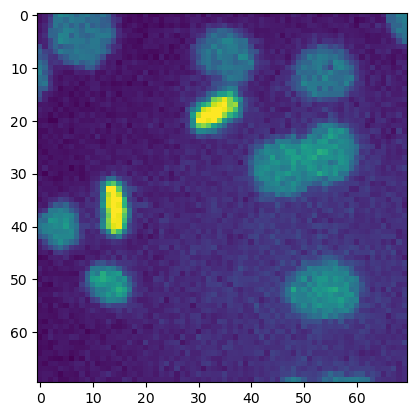

In [19]:
plt.imshow(image_cells)

We can also explicitly create the Figure and Axes instances beforehand and then add plotting elements, like an image.
See other examples of explicitly or implicitly creating figures [here](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#the-explicit-and-the-implicit-interfaces).

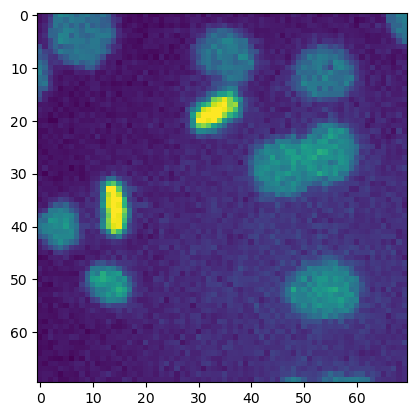

In [20]:
fig, ax = plt.subplots()
ax.imshow(image_cells)

This difference becomes more relevant when we want to ave multiple images/plots in the same figure.

## Classical Image Processing

Below, we apply a few image processing steps to later display each of them in a single figure.

### Apply a gaussian filter

In [5]:
image_filtered = filters.gaussian(image_cells, sigma=0.5)

### Threshold image

In [6]:
threshold = filters.threshold_otsu(image_filtered)
binary_image =  image_filtered > threshold

### Label image

In [7]:
label_image = measure.label(binary_image)

## Creating Multiple Subplots

With the `plt.subplots` function, we can provide optional arguments (`nrwos` and `ncols`) to pre-define a grid of axes.

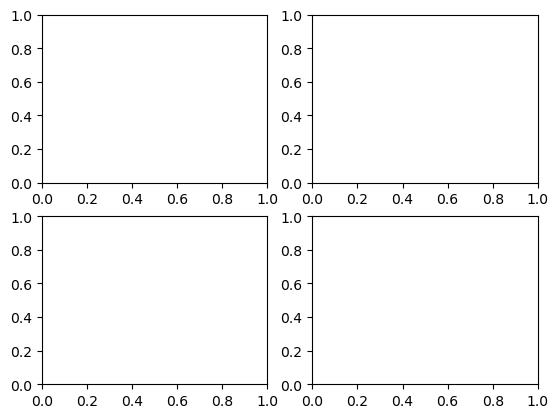

In [23]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

Now, we just have to populate the axes with images or plots, assigning images to the proper axes element by means of row and column indices.

For example, `ax[0, 1]` points to the first row (row #0) and to the second column (col #1).

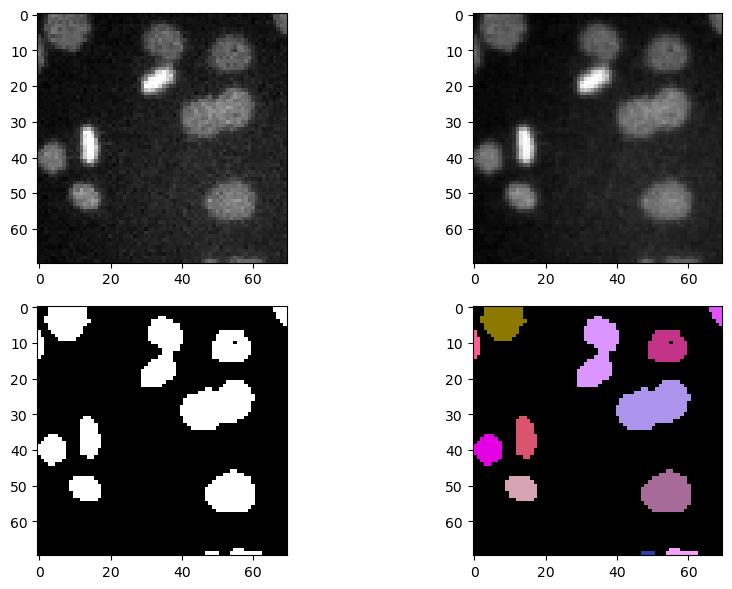

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,6))

ax[0, 0].imshow(image_cells, cmap = 'gray')
ax[0, 1].imshow(image_filtered, cmap = 'gray')
ax[1, 0].imshow(binary_image, cmap = 'gray')
ax[1, 1].imshow(label_image, cmap = glasbey_cmap(), interpolation = 'none')

# Handy function to avoid overlap of labels
plt.tight_layout()

Other properties of individual axes can be edited like this by providing the right axes indexing to the `ax` variable.

To get a overview of the available options that can be edited in a figure, take a look at [this figure](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#parts-of-a-figure)